# 은행 마케팅 데이터 분석

포르투갈의 은행에서 고객에게 전화를 하여 마케팅을 했습니다.

목표는 고객이 상품에 가입할지를 미리 예측하는 것입니다.
실제 가입 여부가 마지막 컬럼에 기입되 있으므로 이를 중심으로 데이터를 분석합니다.

예 
- 젊은 고객이 상품을 가입하는가?
- 집 대출 있는 고객이 상품을 가입하는가?
- 결혼 상태에 따른 상품 가입률은 어떤가? 
- 어떤 직업이 예금이 많을까? 

누락 데이터, 이상치가 있는지 확인하고
sort_value, value_counts, groupby, corr 등을 이용해서 분석합니다
그래프는 hist, box_plot, plot, pie, bar, barh 를 활용합니다

분석 방법
- 타겟이 카테고리면 통계적 분석이 불가능하므로 가능하다면 수치로 변경
- 카테고리 컬럼을 value_counts() 해서 그래프로 그리기 
- 카테고리 컬럼을 groupby() 로 데이터 확인

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('./datasets/bank/bank.csv', sep=';')
df.shape

(4521, 17)

In [95]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

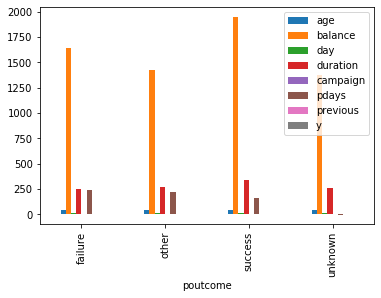

In [114]:
df.groupby('poutcome').mean().plot.bar()

In [96]:
# 가입 여부 y 를 수치로 변경해야지만 통계적 분석이 가능해집니다
# yes = 1 ,no = 1 으로 바꾸자
df.y = df.y.map({'yes':1, 'no':0})  #값을 바꿔서 덮어 쓰기
df.y.unique()

array([0, 1], dtype=int64)

In [97]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


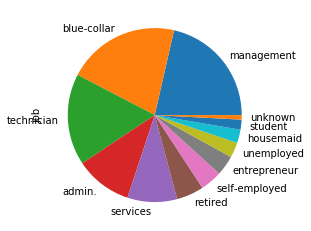

In [99]:
df['job'].value_counts().plot.pie(figsize=(4, 4))

In [101]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [104]:
df.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,y
default,,,,,,,,
no,41.194826,1450.550956,15.929584,264.355906,2.79865,40.111136,0.548481,0.115186
yes,39.723684,-208.723684,15.078947,240.881579,2.50000,19.618421,0.197368,0.118421


In [82]:
df.groupby(['marital', 'job']).mean().head(2)

age     balance        day    duration  campaign  \
marital  job                                                                   
divorced admin.       43.362319  977.811594  16.826087  288.188406  2.463768   
         blue-collar  42.936709  744.797468  15.354430  322.316456  2.531646   

                          pdays  previous  
marital  job                               
divorced admin.       52.550725  0.405797  
         blue-collar  28.291139  0.316456

In [73]:
df.groupby('marital')['y'].value_counts()

marital   y  
divorced  no      451
          yes      77
married   no     2520
          yes     277
single    no     1029
          yes     167
Name: y, dtype: int64

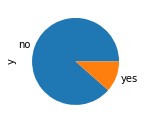

In [64]:
df['y'].value_counts().plot.pie(figsize=(2,2))

In [58]:
df['balance'].sort_values(asciiending=False).head()

3700    71188
2989    42045
1483    27733
1881    27359
3830    27069
Name: balance, dtype: int64

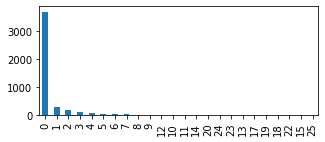

In [61]:
df['previous'].value_counts().plot.bar(figsize=(5,2))

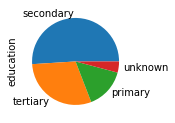

In [59]:
df['education'].value_counts().plot.pie(figsize=(5,2))

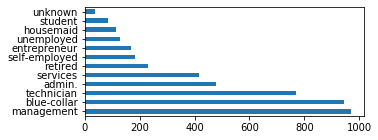

In [35]:
df.job.value_counts().plot.barh(figsize=(5,2))

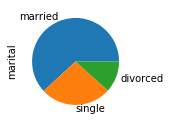

In [36]:
df.marital.value_counts().plot.pie(figsize=(5,2))

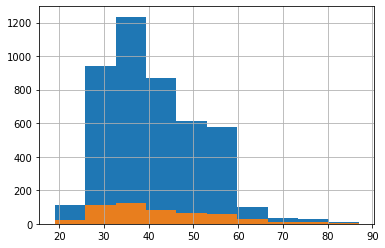

In [25]:
# 'age , 'y' 조건부검색: 상품에 가입한 사람 y='yes'의 age
df.age.hist()
df[df.y=='yes'].age.hist(alpha=0.9)